In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

Example Data:


*   An experiment drug was tested  on individuals from ages 13 to 100 in a clinical trial.
*   The trial has 2100 participants. Half were under 65 years old, half were 65 year or older.

*   Around 95% of patients 65 or older experienced side effects.   
*   Around 95% of patients under 65 experienced no side effects.





In [ ]:
for i in range(50):
  # The ~5% of younger individual who did experienced side effects.
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # The ~5% of older individuals who did not experience side effects.
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # The ~95% of younger individual who did not experience side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # The ~95% of older individual who did experience side effects.
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)  

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [ ]:
scaled_train_samples

array([[0.04597701],
       [0.40229885],
       [0.96551724],
       ...,
       [0.83908046],
       [0.40229885],
       [0.11494253]])

**Simple tf.keras Sequential Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1 ,batch_size=10, epochs=30, shuffle=True, verbose=2)

In [ ]:
test_samples = []
test_labels = []

In [ ]:
for i in range(10):
  # The ~5% of younger individual who did experienced side effects.
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # The ~5% of older individuals who did not experience side effects.
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # The ~95% of younger individual who did not experience side effects
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # The ~95% of older individual who did experience side effects.
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)  

In [ ]:
test_labels = np.array(test_labels)
test_samples =  np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
test_samples = scaler.transform(test_samples.reshape(-1, 1))

In [ ]:
predictions = model.predict(x=test_samples, batch_size=10, verbose=0)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
rounded_predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
cm

array([[194,  16],
       [ 10, 200]])

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  this function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation= 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", 
             color="white" if cm[i, j] >  thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")


Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


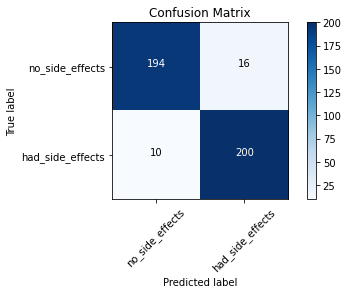

In [ ]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
path = "/content/gdrive/My Drive/models/medical_trials_model.h5"
if os.path.isfile(path) is False:
  model.save(path)

This save function saves:


*   The architecture of the model, allowing to re-create the model.
*   The weights of the model.
*   The training configuration(loss, optimizer).
*   The state of the optimizer, allowingto resume training excatly where you left. 



In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model(path)

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save as JSON
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [ ]:
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# saving the model weights only
path = "/content/gdrive/My Drive/models/my_model_weights.h5"
if os.path.isfile(path) is False:
  model.save_weights(path)

In [ ]:
model2 = Sequential([
                     Dense(units=16, input_shape=(1,), activation='relu'),
                     Dense(units=32, activation='relu'),
                     Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights(path)